# Import dependencies :

In [1]:
import pytools4dart as ptd
from netCDF4 import Dataset
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from functions import Edit_a_opt_depth,Edit_altitude,Edit_a_sca_albedo,Edit_g1,Edit_reflectance,Edit_Transmittance_gaz_absorption,Edit_Transmittance_gaz_scattering,Edit_zenith_angle,calculate_alpha,Edit_lambda,EXTRACT_BOA_RT,atmosphere_param,copy_atmosphere_nc,save_modifications

# Parameters Range :

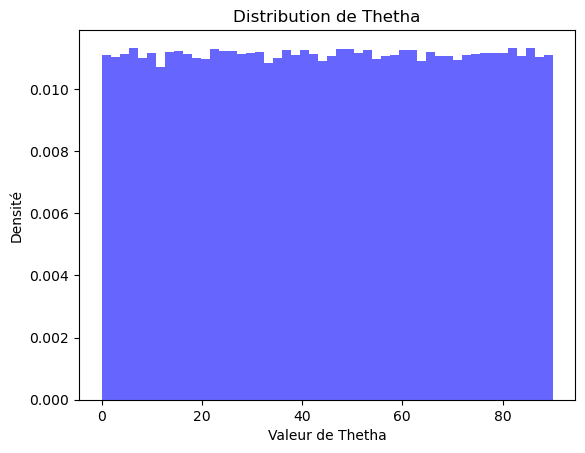

In [31]:
thetha_values = np.random.uniform(0, 90, 378000)
plt.hist(thetha_values, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de Thetha")
plt.ylabel("Densité")
plt.title("Distribution de Thetha")
plt.show()

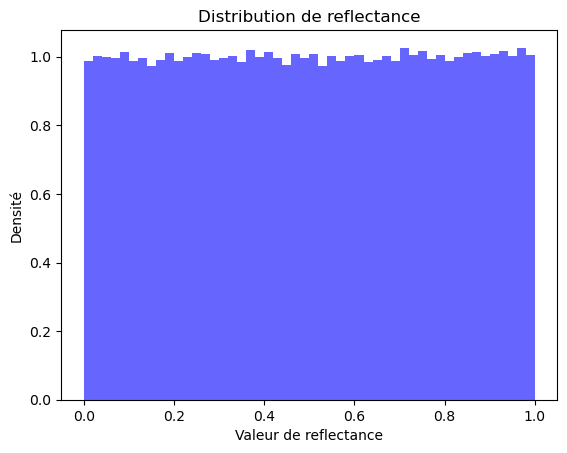

In [32]:
reflectence_values=np.random.uniform(0, 1, 378000)
plt.hist(reflectence_values, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de reflectance")
plt.ylabel("Densité")
plt.title("Distribution de reflectance")
plt.show()



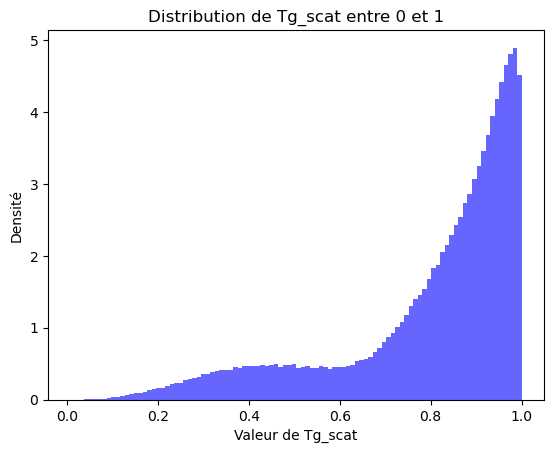

In [35]:
tg_scat_values = np.random.beta(8, 1.1, size=300000) # Générer plusieurs échantillons
tg_scat1 = np.random.beta(13, 3, size=20000)*0.9
tg_scat2 = np.random.beta(4, 3, size=58000)*0.7

tg_scat_values=np.concatenate((tg_scat_values,tg_scat1,tg_scat2))
np.random.shuffle(tg_scat_values)
plt.hist(tg_scat_values, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de Tg_scat")
plt.ylabel("Densité")
plt.title("Distribution de Tg_scat entre 0 et 1")
plt.show()

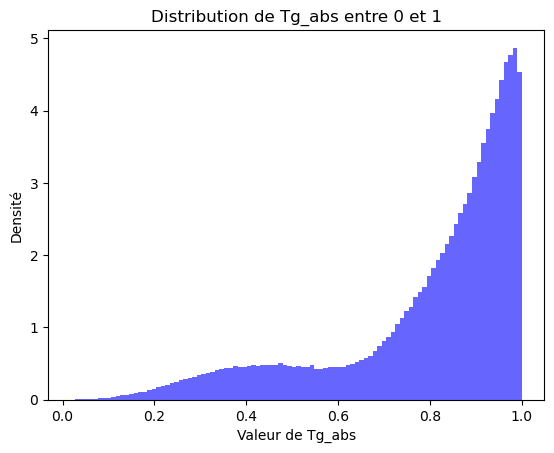

In [36]:
tg_abs_values = np.random.beta(8, 1.1, size=300000) # Générer plusieurs échantillons
tg_abs1 = np.random.beta(13, 3, size=20000)*0.9
tg_abs2 = np.random.beta(4, 3, size=58000)*0.7
tg_abs_values=np.concatenate((tg_abs_values,tg_abs1,tg_abs2))
np.random.shuffle(tg_abs_values)
plt.hist(tg_abs_values, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de Tg_abs")
plt.ylabel("Densité")
plt.title("Distribution de Tg_abs entre 0 et 1")
plt.show()

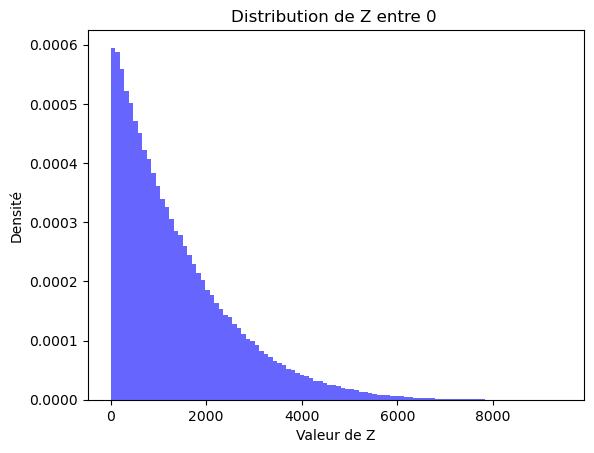

In [52]:
altitude_values = np.random.beta(1.01,7, size=378000)*11000
np.random.shuffle(altitude_values)
plt.hist(altitude_values, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de Z")
plt.ylabel("Densité")
plt.title("Distribution de Z entre 0 ")
plt.show()

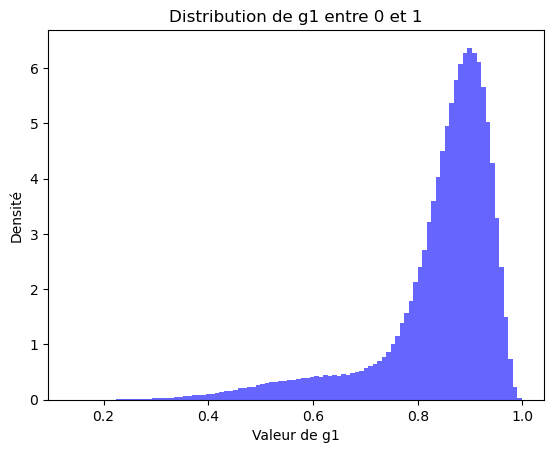

In [39]:
g1_values = np.random.beta(28,4, size=330000)
g1_2 = np.random.beta(8, 4, size=48000)*0.9
g1_values =np.concatenate((g1_values,g1_2))
np.random.shuffle(g1_values)
plt.hist(g1_values ,bins=100, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de g1")
plt.ylabel("Densité")
plt.title("Distribution de g1 entre 0 et 1")
plt.show()

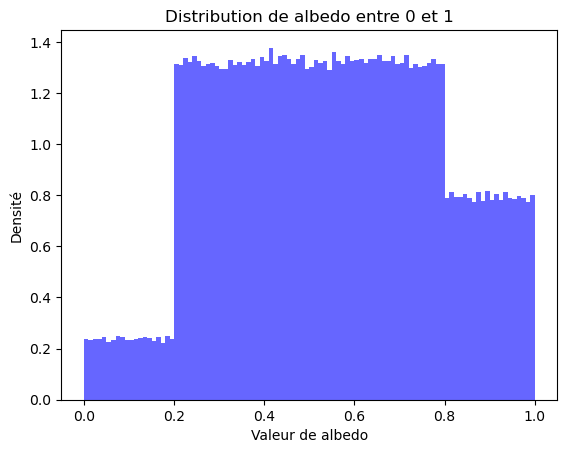

In [40]:
SSA_values1 =np.random.uniform(0.8,1, 60000)
SSA_values2 =np.random.uniform(0.2,0.8, 300000)
SSA_values3 =np.random.uniform(0,0.2, 18000)
SSA_values=np.concatenate((SSA_values1,SSA_values2,SSA_values3))
np.random.shuffle(SSA_values)
plt.hist(SSA_values, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de albedo")
plt.ylabel("Densité")
plt.title("Distribution de albedo entre 0 et 1")
plt.show()

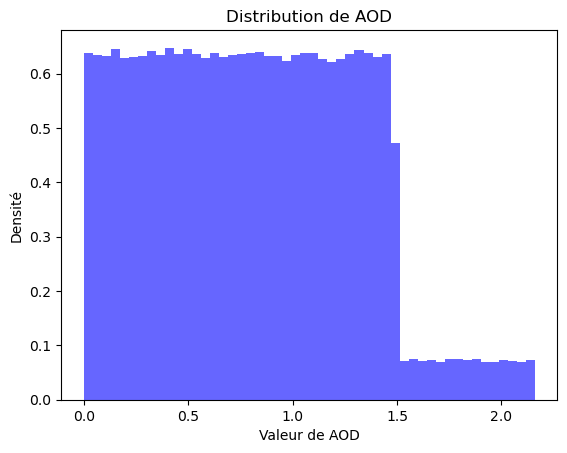

In [41]:
AOD1=np.random.uniform(0,1.5, 360000)
AOD2=np.random.uniform(1.5,2.16, 18000)
AOD_values=np.concatenate((AOD1,AOD2))
np.random.shuffle(AOD_values)
plt.hist(AOD_values, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel("Valeur de AOD")
plt.ylabel("Densité")
plt.title("Distribution de AOD")
plt.show()


In [42]:
def muprime(z,h,µ):
    RAYON_TERRESTRE=6371
    eta = (RAYON_TERRESTRE*1000 + z) / h
    root = (eta*µ)**2  + 2 * eta + 1
    sum = (root)**0.5 - eta * µ
    if sum > 0 :
        return 1/sum
    return 1 

In [43]:
column_names=['Tg_scat','Tg_abs','Ta_abs','SSA','GOD','AOD','AODS','SZA','Z','R_scence','g1','Cos(SZA)','mu_g','mu_a','muprime_g','muprime_a','mprime_g','mprime_a','BOA_RT','alpha']
df = pd.DataFrame(columns=column_names)

In [44]:
Hg=9000
Ha=2000

In [ ]:
df['Tg_scat']=tg_scat_values
df['Tg_abs']=tg_abs_values
df['GOD']=-np.log(df['Tg_scat'])
df['AOD']=AOD_values
df['SSA']=SSA_values
df['SZA']=thetha_values
df['Z']=altitude_values
df['R_scence']=reflectence_values
df['g1']=g1_values
df['Cos(SZA)']=np.cos(np.radians(df['SZA']))
df['Ta_abs']=np.exp(-df['AOD']*(1-df['SSA']))
df['AODS']=df['AOD']*df['SSA']
df['mu_g']=(6371*1000+df['Z'])/Hg
df['mu_a']=(6371*1000+df['Z'])/Ha
df['muprime_g'] = df.apply(lambda row: muprime(row['Z'],Hg,row['Cos(SZA)']), axis=1)
df['muprime_a'] = df.apply(lambda row: muprime(row['Z'],Ha,row['Cos(SZA)']), axis=1)
df['mprime_g']=np.exp(-df['Z']/Hg)/df['muprime_g']
df['mprime_a']=np.exp(-df['Z']/Ha)/df['muprime_a']


In [61]:
df.to_csv('data.csv', index=False)